# Import Dependencies 

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data Clean-up

In [3]:
df = pd.read_csv("../Proj 1/vehicleFARS.csv")
df.head()

,YEAR,ST_CASE,VEH_NO,A_BODY,A_IMP1,A_VROLL,A_SPVEH,A_MOD_YR,A_DRDIS,A_DRDRO
0,2015,10001,1,Light Truck - Pickup,Front,No Rollover,No Speed Involved,2003,Other,Other
1,2015,10002,1,Passenger Car,Rear,Rollover,Speed Involved,2006,Other,Other
2,2015,10003,1,Passenger Car,Front,Rollover,No Speed Involved,2008,Other,Other
3,2015,10004,1,Light Truck - Pickup,Front,No Rollover,No Speed Involved,2005,Other,Other
4,2015,10005,1,Passenger Car,Right Side,Rollover,No Speed Involved,2006,Other,Other


# Define and Rename Columns

In [4]:
df.columns

Index(['YEAR', 'ST_CASE', 'VEH_NO', 'A_BODY', 'A_IMP1', 'A_VROLL', 'A_SPVEH',
       'A_MOD_YR', 'A_DRDIS', 'A_DRDRO'],
      dtype='object')

In [5]:
df = df.rename(
    columns={"VEH_NO": "No_of_Vehicles",
            "A_BODY": "Body_Type",
            "A_IMP1": "Collision_Location",
            "A_VROLL": "Rollover",
            "A_SPVEH": "Speeding",
            "A_MOD_YR": "Model_Year",
            "A_DRDIS": "Distracted_Driver",
            "A_DRDRO": "Drowsy_Driver"})
df.head()

,YEAR,ST_CASE,No_of_Vehicles,Body_Type,Collision_Location,Rollover,Speeding,Model_Year,Distracted_Driver,Drowsy_Driver
0,2015,10001,1,Light Truck - Pickup,Front,No Rollover,No Speed Involved,2003,Other,Other
1,2015,10002,1,Passenger Car,Rear,Rollover,Speed Involved,2006,Other,Other
2,2015,10003,1,Passenger Car,Front,Rollover,No Speed Involved,2008,Other,Other
3,2015,10004,1,Light Truck - Pickup,Front,No Rollover,No Speed Involved,2005,Other,Other
4,2015,10005,1,Passenger Car,Right Side,Rollover,No Speed Involved,2006,Other,Other


# Rename the cell data to be more clear

In [6]:
df['Distracted_Driver'] = df['Distracted_Driver'].replace(
    {'Other': 'No', 'Yes - Distracted Driver': 'Yes'})
df.head()


,YEAR,ST_CASE,No_of_Vehicles,Body_Type,Collision_Location,Rollover,Speeding,Model_Year,Distracted_Driver,Drowsy_Driver
0,2015,10001,1,Light Truck - Pickup,Front,No Rollover,No Speed Involved,2003,No,Other
1,2015,10002,1,Passenger Car,Rear,Rollover,Speed Involved,2006,No,Other
2,2015,10003,1,Passenger Car,Front,Rollover,No Speed Involved,2008,No,Other
3,2015,10004,1,Light Truck - Pickup,Front,No Rollover,No Speed Involved,2005,No,Other
4,2015,10005,1,Passenger Car,Right Side,Rollover,No Speed Involved,2006,No,Other


In [7]:
df['Rollover_Num'] = df['Rollover'].replace(
    {'No Rollover': 0, 'Rollover': 1})
df.head()

,YEAR,ST_CASE,No_of_Vehicles,Body_Type,Collision_Location,Rollover,Speeding,Model_Year,Distracted_Driver,Drowsy_Driver,Rollover_Num
0,2015,10001,1,Light Truck - Pickup,Front,No Rollover,No Speed Involved,2003,No,Other,0
1,2015,10002,1,Passenger Car,Rear,Rollover,Speed Involved,2006,No,Other,1
2,2015,10003,1,Passenger Car,Front,Rollover,No Speed Involved,2008,No,Other,1
3,2015,10004,1,Light Truck - Pickup,Front,No Rollover,No Speed Involved,2005,No,Other,0
4,2015,10005,1,Passenger Car,Right Side,Rollover,No Speed Involved,2006,No,Other,1


In [8]:
df['Speed_Num'] = df['Speeding'].replace(
    {'Speed Involved': 1, 'No Speed Involved': 0})
df.head()

,YEAR,ST_CASE,No_of_Vehicles,Body_Type,Collision_Location,Rollover,Speeding,Model_Year,Distracted_Driver,Drowsy_Driver,Rollover_Num,Speed_Num
0,2015,10001,1,Light Truck - Pickup,Front,No Rollover,No Speed Involved,2003,No,Other,0,0
1,2015,10002,1,Passenger Car,Rear,Rollover,Speed Involved,2006,No,Other,1,1
2,2015,10003,1,Passenger Car,Front,Rollover,No Speed Involved,2008,No,Other,1,0
3,2015,10004,1,Light Truck - Pickup,Front,No Rollover,No Speed Involved,2005,No,Other,0,0
4,2015,10005,1,Passenger Car,Right Side,Rollover,No Speed Involved,2006,No,Other,1,0


# Investigate if rollovers are more common if the vehicle was speeding

<Figure size 432x288 with 0 Axes>

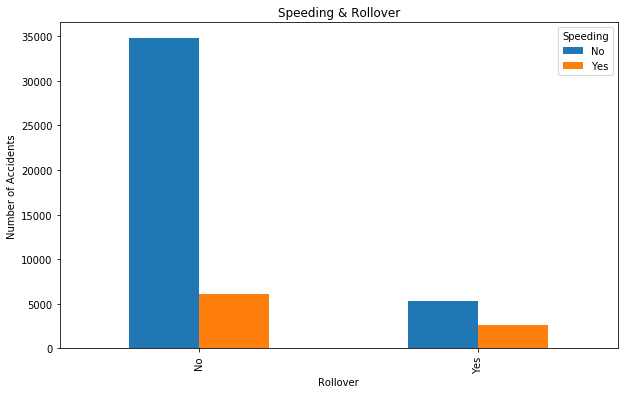

In [21]:
plt.figure()
df.groupby(['Rollover','Speeding'])['ST_CASE'].count().unstack().plot(kind='bar',subplots=False,figsize=(10,6))
plt.title("Speeding & Rollover")
plt.ylabel("Number of Accidents")
plt.savefig('Speeding_&_Rollover')
                                                                               

In [10]:
df['Drowsy_Driver'] = df['Drowsy_Driver'].replace(
    {'Other': 'No', 'Yes - Drowsy Driver': 'Yes'})
df.head()


,YEAR,ST_CASE,No_of_Vehicles,Body_Type,Collision_Location,Rollover,Speeding,Model_Year,Distracted_Driver,Drowsy_Driver,Rollover_Num,Speed_Num
0,2015,10001,1,Light Truck - Pickup,Front,No Rollover,No Speed Involved,2003,No,No,0,0
1,2015,10002,1,Passenger Car,Rear,Rollover,Speed Involved,2006,No,No,1,1
2,2015,10003,1,Passenger Car,Front,Rollover,No Speed Involved,2008,No,No,1,0
3,2015,10004,1,Light Truck - Pickup,Front,No Rollover,No Speed Involved,2005,No,No,0,0
4,2015,10005,1,Passenger Car,Right Side,Rollover,No Speed Involved,2006,No,No,1,0


In [11]:
df['Speeding'] = df['Speeding'].replace(
    {'No Speed Involved': 'No', 'Speed Involved': 'Yes'})
df.head()


,YEAR,ST_CASE,No_of_Vehicles,Body_Type,Collision_Location,Rollover,Speeding,Model_Year,Distracted_Driver,Drowsy_Driver,Rollover_Num,Speed_Num
0,2015,10001,1,Light Truck - Pickup,Front,No Rollover,No,2003,No,No,0,0
1,2015,10002,1,Passenger Car,Rear,Rollover,Yes,2006,No,No,1,1
2,2015,10003,1,Passenger Car,Front,Rollover,No,2008,No,No,1,0
3,2015,10004,1,Light Truck - Pickup,Front,No Rollover,No,2005,No,No,0,0
4,2015,10005,1,Passenger Car,Right Side,Rollover,No,2006,No,No,1,0


In [12]:
df['Rollover'] = df['Rollover'].replace(
    {'No Rollover': 'No', 'Rollover': 'Yes'})
df.head()


,YEAR,ST_CASE,No_of_Vehicles,Body_Type,Collision_Location,Rollover,Speeding,Model_Year,Distracted_Driver,Drowsy_Driver,Rollover_Num,Speed_Num
0,2015,10001,1,Light Truck - Pickup,Front,No,No,2003,No,No,0,0
1,2015,10002,1,Passenger Car,Rear,Yes,Yes,2006,No,No,1,1
2,2015,10003,1,Passenger Car,Front,Yes,No,2008,No,No,1,0
3,2015,10004,1,Light Truck - Pickup,Front,No,No,2005,No,No,0,0
4,2015,10005,1,Passenger Car,Right Side,Yes,No,2006,No,No,1,0


In [13]:
#type of vehicle
#count of vehicle 


In [14]:
BodyType = df.groupby('Body_Type').count()['YEAR']
BodyType = BodyType.sort_values(ascending=False)
BodyType

Body_Type
Passenger Car            19534
Light Truck - Pickup      8698
Light Truck - Utility     7636
Motorcycle                5076
Large Truck               4050
Light Truck - Van         2172
Other/Unknown             1327
Bus                        261
Light Truck - Other        169
Name: YEAR, dtype: int64

# Body Type of Vehicle for Fatal Crashes

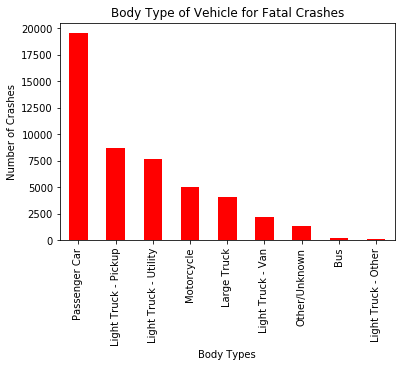

In [22]:
BodyType.plot(kind='bar', color='r', align="center")
plt.title("Body Type of Vehicle for Fatal Crashes")
plt.xlabel("Body Types")
plt.ylabel("Number of Crashes")
plt.savefig('Body_Type_of_Vehicle_for_Fatal_Crashes')

In [16]:
BodyTypedf = pd.DataFrame({"Total Accidents": BodyType}) 
                            
BodyTypedf

,Total Accidents
Body_Type,
Passenger Car,19534
Light Truck - Pickup,8698
Light Truck - Utility,7636
Motorcycle,5076
Large Truck,4050
Light Truck - Van,2172
Other/Unknown,1327
Bus,261
Light Truck - Other,169


# Drowsy Driver

In [17]:
DrowsyDriver = df.groupby('Drowsy_Driver').count()['YEAR']
DrowsyDriver = DrowsyDriver.sort_values(ascending=False)

DrowsyDriverdf = pd.DataFrame({"Total Accidents": DrowsyDriver}) 
                            
DrowsyDriverdf

,Total Accidents
Drowsy_Driver,
No,48187
Yes,736


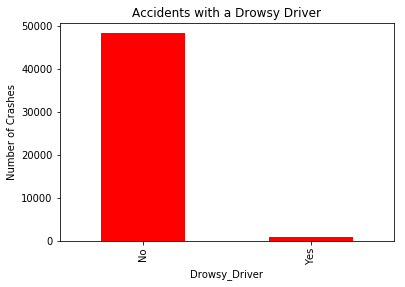

In [23]:
DrowsyDriver.plot(kind='bar', color='r', align="center")
plt.title("Accidents with a Drowsy Driver")
plt.ylabel("Number of Crashes")
plt.savefig('Accidents_with_Drowsy_Driver')

# Distracted Driver

In [19]:
DistractedDriver = df.groupby('Distracted_Driver').count()['YEAR']
DistractedDriver = DistractedDriver.sort_values(ascending=False)
 
DistractedDriverdf = pd.DataFrame({"Total Accidents": DrowsyDriver}) 
                            
DistractedDriverdf

,Total Accidents
Drowsy_Driver,
No,48187
Yes,736


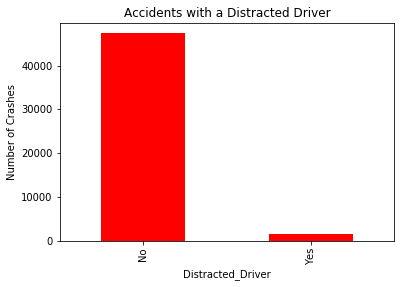

In [24]:
DistractedDriver.plot(kind='bar', color='r', align="center")
plt.title("Accidents with a Distracted Driver")
plt.ylabel("Number of Crashes")
plt.savefig('Accidents_with_a_Distracted_Driver')